# Resampling

- for 2 or more rasters with different resolutions and origins
- takes values of original raster and recalculates or target raster

Methods include 
- __Nearest neighbor__ - for categorical rasters
- __Bilinear interpolation__ - weighted average of four nearest cells, for continuous rasters
- __Cubic interpolation__ - uses 16 nearest cells and a cubic polynomial, smoother but slower than bilinear
- __Cubic spine interpolation__ - same but with cubic splines
- __Lanczos windowed sinc resampling__ - 36 nearest cells
- Summary methods on all pixels coincident with target pixel

>reprojection and resampling
>
>- resampling: source and target have same CRS
>- reprojection: source and target have different CRS
>

`rasterio.warp.reproject`
- requires the source and target CRSs and transforms
- can use file connections

Destination transform from
- template raster, either existing raster or numeric specification
- simple aggregation/disaggretation if exact grid is not importatnt

Resampling parameters

    rasterio.enums.Resampling.nearest—Nearest neighbor
    rasterio.enums.Resampling.bilinear—Bilinear
    rasterio.enums.Resampling.cubic—Cubic
    rasterio.enums.Resampling.lanczos—Lanczos windowed
    rasterio.enums.Resampling.average—Average
    rasterio.enums.Resampling.mode—Mode. i.e., most common value
    rasterio.enums.Resampling.min—Minimum
    rasterio.enums.Resampling.max—Maximum
    rasterio.enums.Resampling.med—Median
    rasterio.enums.Resampling.sum—Sum

In [1]:
xmin = 794650
xmax = 798250
ymin = 8931750 
ymax = 8935350
res = 300

In [3]:
import rasterio.transform
dst_transform = rasterio.transform.from_origin(
    west=xmin, 
    north=ymax, 
    xsize=res, 
    ysize=res
)
dst_transform

Affine(300.0, 0.0, 794650.0,
       0.0, -300.0, 8935350.0)

In [4]:
width = int((xmax - xmin) / res)
height = int((ymax - ymin) / res) 
width, height

(12, 12)

In [5]:
from helpers import src_dem as src 

In [6]:
dst_kwargs = src.meta.copy() 
dst_kwargs.update({
    'transform': dst_transform, 
    'width': width, 
    'height': height
})
dst = rasterio.open('../output/dem_resample_nearest.tif', 'w',
                   **dst_kwargs)

In [7]:
import rasterio.warp

In [8]:
rasterio.warp.reproject(
    source=rasterio.band(src, 1), 
    destination=rasterio.band(dst, 1), 
    src_transform=src.transform, 
    src_crs=src.crs, 
    dst_transform=dst_transform, 
    dst_crs=src.crs, 
    resampling=rasterio.enums.Resampling.nearest
)

(None,
 Affine(300.0, 0.0, 794650.0,
        0.0, -300.0, 8935350.0))

In [9]:
dst_transform = rasterio.transform.from_origin(
    west=xmin, 
    north=ymax, 
    xsize=res, 
    ysize=res
)
dst_transform

Affine(300.0, 0.0, 794650.0,
       0.0, -300.0, 8935350.0)

In [10]:
width = int((xmax - xmin) / res)
height = int((ymax - ymin) / res)
width, height

(12, 12)

In [12]:
dst_kwargs = src.meta.copy()
dst_kwargs.update({
    'transform': dst_transform,
    'width': width,
    'height': height
})
dst = rasterio.open('../output/dem_resample_nearest.tif', 'w', **dst_kwargs)

In [13]:
rasterio.warp.reproject(
    source=rasterio.band(src, 1),
    destination=rasterio.band(dst, 1),
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=dst_transform,
    dst_crs=src.crs,
    resampling=rasterio.enums.Resampling.nearest
)

(None,
 Affine(300.0, 0.0, 794650.0,
        0.0, -300.0, 8935350.0))

In [14]:
dst.close()

>Resample with min values

In [15]:
dst = rasterio.open('../output/dem_resample_maximum.tif', 'w', **dst_kwargs)
rasterio.warp.reproject(
    source=rasterio.band(src, 1),
    destination=rasterio.band(dst, 1),
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=dst_transform,
    dst_crs=src.crs,
    resampling=rasterio.enums.Resampling.max
)
dst.close()

In [18]:
import matplotlib.pyplot as plt
import rasterio.plot

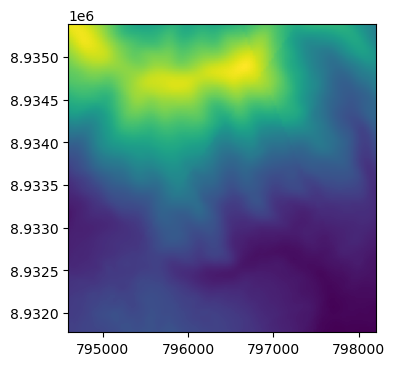

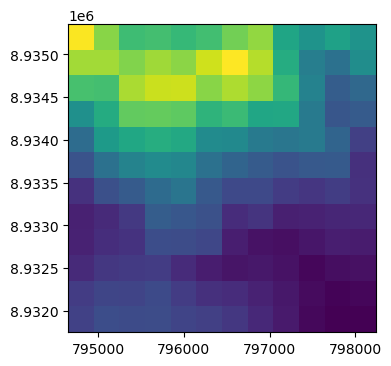

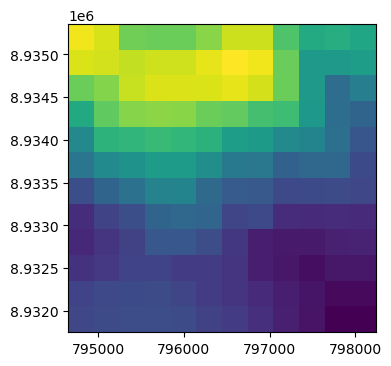

In [19]:
# Input
fig, ax = plt.subplots(figsize=(4,4))
rasterio.plot.show(src, ax=ax);
# Nearest neighbor
fig, ax = plt.subplots(figsize=(4,4))
rasterio.plot.show(rasterio.open('../output/dem_resample_nearest.tif'), ax=ax);
# Maximum
fig, ax = plt.subplots(figsize=(4,4))
rasterio.plot.show(rasterio.open('../output/dem_resample_maximum.tif'), ax=ax);